<a href="https://colab.research.google.com/github/MiracleCakra/Machine-Learning_Ganjil_2025/blob/main/Week11_JS11_KLASIFIKASI2/Tugas_Praktikum_KLASIFIKASI2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  SVM CLASSIFICATION

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv('voice (1).csv')

print(f"Dataset loaded successfully")
print(f"  Shape: {df.shape}")
print(f"  Columns: {df.columns.tolist()}")

Dataset loaded successfully
  Shape: (3168, 21)
  Columns: ['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label']


##  Exploratory Data Analysis (EDA)

In [12]:
print("\nDataset Preview:")
print(df.head())

print("\n\nDataset Info:")
print(f"  Total Rows: {len(df)}")
print(f"  Total Columns: {len(df.columns)}")
print(f"  Missing Values: {df.isnull().sum().sum()}")
print(f"  Duplicate Rows: {df.duplicated().sum()}")

print("\n\nLabel Distribution:")
print(df['label'].value_counts())

print("\n\nStatistical Summary:")
print(df.describe())


[STEP 1.3] Exploratory Data Analysis...

Dataset Preview:
   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   d

## Data Preprocessing

In [13]:
# Encode label
print("  → Encoding labels...")
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
print(f"    Label mapping: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Separate features and target
X = df.drop('label', axis=1)
y = df['label']
print(f"  → Features shape: {X.shape}")
print(f"  → Target shape: {y.shape}")

# Feature Scaling
print("  → Scaling features...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(f"    Scaled features shape: {X_scaled.shape}")

print("✓ Preprocessing completed")


[STEP 1.4] Data Preprocessing...
  → Encoding labels...
    Label mapping: {'female': np.int64(0), 'male': np.int64(1)}
  → Features shape: (3168, 20)
  → Target shape: (3168,)
  → Scaling features...
    Scaled features shape: (3168, 20)
✓ Preprocessing completed


##  Model Training dan Evaluasi - Split 70:30

In [14]:
results_70_30 = []

for kernel in ['linear', 'poly', 'rbf']:
    print(f"\n  Training {kernel.upper()} kernel...")

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.3, random_state=42, stratify=y
    )

    print(f"    Train size: {len(X_train)}, Test size: {len(X_test)}")

    # Train model
    model = SVC(kernel=kernel, random_state=42)
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

    print(f"    Train Accuracy: {train_acc:.4f}")
    print(f"    Test Accuracy: {test_acc:.4f}")
    print(f"    CV Mean: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

    results_70_30.append({
        'Split': '70:30',
        'Kernel': kernel.upper(),
        'Train Acc': train_acc,
        'Test Acc': test_acc,
        'CV Mean': cv_scores.mean(),
        'CV Std': cv_scores.std()
    })

print("\n✓ Split 70:30 completed")


[STEP 1.5] Model Training - Split 70:30...
--------------------------------------------------------------------------------

  Training LINEAR kernel...
    Train size: 2217, Test size: 951
    Train Accuracy: 0.9720
    Test Accuracy: 0.9790
    CV Mean: 0.9693 (±0.0039)

  Training POLY kernel...
    Train size: 2217, Test size: 951
    Train Accuracy: 0.9680
    Test Accuracy: 0.9590
    CV Mean: 0.9517 (±0.0088)

  Training RBF kernel...
    Train size: 2217, Test size: 951
    Train Accuracy: 0.9838
    Test Accuracy: 0.9832
    CV Mean: 0.9775 (±0.0068)

✓ Split 70:30 completed


## Model Training dan Evaluasi - Split 80:20

In [15]:
results_80_20 = []

for kernel in ['linear', 'poly', 'rbf']:
    print(f"\n  Training {kernel.upper()} kernel...")

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42, stratify=y
    )

    print(f"    Train size: {len(X_train)}, Test size: {len(X_test)}")

    # Train model
    model = SVC(kernel=kernel, random_state=42)
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

    print(f"    Train Accuracy: {train_acc:.4f}")
    print(f"    Test Accuracy: {test_acc:.4f}")
    print(f"    CV Mean: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

    results_80_20.append({
        'Split': '80:20',
        'Kernel': kernel.upper(),
        'Train Acc': train_acc,
        'Test Acc': test_acc,
        'CV Mean': cv_scores.mean(),
        'CV Std': cv_scores.std()
    })

print("\n✓ Split 80:20 completed")


[STEP 1.6] Model Training - Split 80:20...
--------------------------------------------------------------------------------

  Training LINEAR kernel...
    Train size: 2534, Test size: 634
    Train Accuracy: 0.9763
    Test Accuracy: 0.9748
    CV Mean: 0.9732 (±0.0036)

  Training POLY kernel...
    Train size: 2534, Test size: 634
    Train Accuracy: 0.9684
    Test Accuracy: 0.9574
    CV Mean: 0.9550 (±0.0144)

  Training RBF kernel...
    Train size: 2534, Test size: 634
    Train Accuracy: 0.9842
    Test Accuracy: 0.9826
    CV Mean: 0.9791 (±0.0049)

✓ Split 80:20 completed


## Tabulasi Hasil

In [16]:
print("\n" + "="*80)
print("HASIL EVALUASI MODEL SVM - VOICE DATASET".center(80))
print("="*80)

# Combine results
all_results = results_70_30 + results_80_20
results_df = pd.DataFrame(all_results)

# Format for display
display_df = pd.DataFrame({
    'Split Ratio': results_df['Split'],
    'Kernel': results_df['Kernel'],
    'Train Accuracy': results_df['Train Acc'].apply(lambda x: f"{x:.4f}"),
    'Test Accuracy': results_df['Test Acc'].apply(lambda x: f"{x:.4f}"),
    'CV Mean': results_df['CV Mean'].apply(lambda x: f"{x:.4f}"),
    'CV Std': results_df['CV Std'].apply(lambda x: f"±{x:.4f}")
})

print(tabulate(display_df, headers='keys', tablefmt='fancy_grid', showindex=False))

# Best model
best_idx = results_df['Test Acc'].idxmax()
best_model_info = results_df.iloc[best_idx]

print(f"BEST MODEL:")
print(f"   Kernel: {best_model_info['Kernel']}")
print(f"   Split: {best_model_info['Split']}")


[STEP 1.7] Results Summary...

                    HASIL EVALUASI MODEL SVM - VOICE DATASET                    
╒═══════════════╤══════════╤══════════════════╤═════════════════╤═══════════╤══════════╕
│ Split Ratio   │ Kernel   │   Train Accuracy │   Test Accuracy │   CV Mean │ CV Std   │
╞═══════════════╪══════════╪══════════════════╪═════════════════╪═══════════╪══════════╡
│ 70:30         │ LINEAR   │           0.972  │          0.979  │    0.9693 │ ±0.0039  │
├───────────────┼──────────┼──────────────────┼─────────────────┼───────────┼──────────┤
│ 70:30         │ POLY     │           0.968  │          0.959  │    0.9517 │ ±0.0088  │
├───────────────┼──────────┼──────────────────┼─────────────────┼───────────┼──────────┤
│ 70:30         │ RBF      │           0.9838 │          0.9832 │    0.9775 │ ±0.0068  │
├───────────────┼──────────┼──────────────────┼─────────────────┼───────────┼──────────┤
│ 80:20         │ LINEAR   │           0.9763 │          0.9748 │    0.9732 │ ±0.0036 

## Visualisasi Confusion Matrix (Best Model)


[STEP 1.8] Creating Confusion Matrix for Best Model...


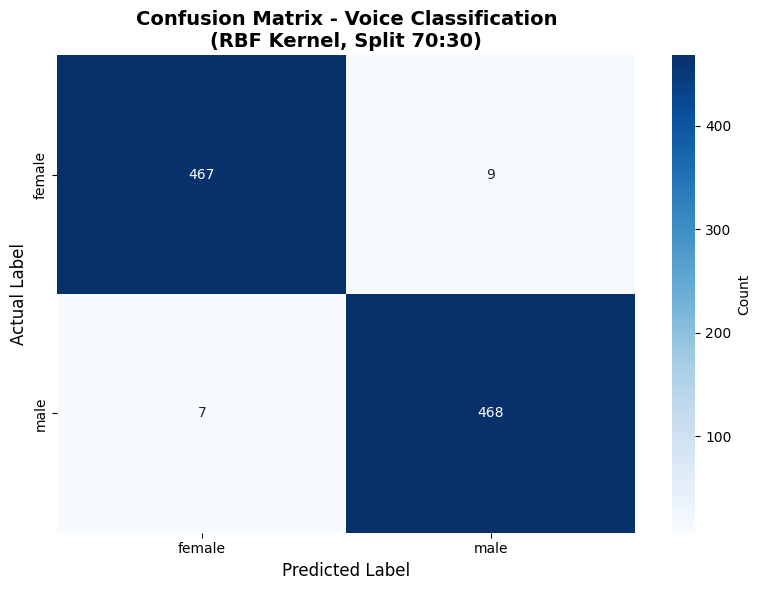

✓ Confusion matrix created


In [17]:
# Train best model
best_kernel = best_model_info['Kernel'].lower()
best_split = 0.2 if best_model_info['Split'] == '80:20' else 0.3

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=best_split, random_state=42, stratify=y
)

best_model = SVC(kernel=best_kernel, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_,
            cbar_kws={'label': 'Count'})
plt.title(f'Confusion Matrix - Voice Classification\n({best_kernel.upper()} Kernel, Split {best_model_info["Split"]})',
          fontsize=14, fontweight='bold')
plt.ylabel('Actual Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

print("✓ Confusion matrix created")

In [19]:
# ----------------------------------------------------------------------------
# STEP 1.9: Classification Report
# ----------------------------------------------------------------------------
print("\n[STEP 1.9] Classification Report (Best Model)...")
print("\n" + classification_report(y_test, y_pred, target_names=le.classes_, digits=4))


[STEP 1.9] Classification Report (Best Model)...

              precision    recall  f1-score   support

      female     0.9852    0.9811    0.9832       476
        male     0.9811    0.9853    0.9832       475

    accuracy                         0.9832       951
   macro avg     0.9832    0.9832    0.9832       951
weighted avg     0.9832    0.9832    0.9832       951



#  KLASIFIKASI SIANG-MALAM DENGAN HISTOGRAM FEATURES

In [30]:
from pathlib import Path
import matplotlib.image as mpimg
import cv2

## Ekstrak Dataset dari ZIP dan Definisi Path

In [32]:
import zipfile
import os

# Path ke file ZIP di folder Colab (upload manual via file browser)
zip_path = "/content/images.zip"

# Lokasi ekstraksi
extract_path = "/content/images_extracted/"

# Cek apakah file ZIP ada
if not os.path.exists(zip_path):
    print(f"ZIP file not found: {zip_path}")
    print(f"Please upload 'images.zip' to /content/ folder")
    print(f"Use Colab file browser (left panel) to upload the ZIP file")
else:
    print(f"ZIP file found: {zip_path}")

    # Cek apakah sudah diekstrak sebelumnya
    if not os.path.exists(extract_path):
        print(f"  📦 Extracting ZIP file...")
        print(f"     Source: {zip_path}")
        print(f"     Destination: {extract_path}")

        # Ekstrak ZIP
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            # Tampilkan progress
            file_list = zip_ref.namelist()
            total_files = len(file_list)
            print(f"     Total files in ZIP: {total_files}")

            zip_ref.extractall(extract_path)

        print(f"Extraction completed!")
    else:
        print(f"Dataset already extracted at: {extract_path}")

# Definisi path dataset
train_dir = os.path.join(extract_path, "images/training/")
test_dir = os.path.join(extract_path, "images/test/")

# Verifikasi path exists
print("\n  🔍 Verifying directories...")
if os.path.exists(train_dir):
    print(f"Train directory found: {train_dir}")
    # Hitung jumlah file
    train_files = sum([len(files) for r, d, files in os.walk(train_dir)])
    print(f"     Total files: {train_files}")
else:
    print(f"Train directory NOT found: {train_dir}")

if os.path.exists(test_dir):
    print(f" Test directory found: {test_dir}")
    # Hitung jumlah file
    test_files = sum([len(files) for r, d, files in os.walk(test_dir)])
    print(f"     Total files: {test_files}")
else:
    print(f"Test directory NOT found: {test_dir}")

# Tampilkan struktur folder
print("Directory structure:")
if os.path.exists(train_dir):
    train_subdirs = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
    print(f"     Training subdirectories: {train_subdirs}")
    for subdir in train_subdirs:
        subdir_path = os.path.join(train_dir, subdir)
        count = len([f for f in os.listdir(subdir_path) if f.endswith('.jpg')])
        print(f"       - {subdir}: {count} images")

if os.path.exists(test_dir):
    test_subdirs = [d for d in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, d))]
    print(f"     Testing subdirectories: {test_subdirs}")
    for subdir in test_subdirs:
        subdir_path = os.path.join(test_dir, subdir)
        count = len([f for f in os.listdir(subdir_path) if f.endswith('.jpg')])
        print(f"       - {subdir}: {count} images")


ZIP file found: /content/images.zip
Dataset already extracted at: /content/images_extracted/

  🔍 Verifying directories...
Train directory found: /content/images_extracted/images/training/
     Total files: 240
 Test directory found: /content/images_extracted/images/test/
     Total files: 160
Directory structure:
     Training subdirectories: ['day', 'night']
       - day: 120 images
       - night: 120 images
     Testing subdirectories: ['day', 'night']
       - day: 80 images
       - night: 80 images


## Load Dataset

In [33]:
def load_dataset(img_dir):
    """Load images from directory"""
    p = Path(img_dir)
    dirs = p.glob('*')
    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)
            if img is not None:
                img_list.append((img, label))

    return img_list

## Load Images

In [35]:
train_img = load_dataset(train_dir)
test_img = load_dataset(test_dir)

print(f"Images loaded:")
print(f"  Training images: {len(train_img)}")
print(f"  Testing images: {len(test_img)}")

# Check label distribution
train_labels = [label for _, label in train_img]
test_labels = [label for _, label in test_img]

print(f"\n  Training label distribution:")
for label in set(train_labels):
    count = train_labels.count(label)
    print(f"    {label}: {count}")

print(f"\n  Testing label distribution:")
for label in set(test_labels):
    count = test_labels.count(label)
    print(f"    {label}: {count}")

Images loaded:
  Training images: 240
  Testing images: 160

  Training label distribution:
    night: 120
    day: 120

  Testing label distribution:
    night: 80
    day: 80


## Preprocessing

In [36]:
def standarized_input(image):
    """Resize image to standard size"""
    return cv2.resize(image, (1100, 600))

def label_encoder_img(label):
    """Encode label: day=1, night=0"""
    return 1 if label == 'day' else 0

def preprocess(img_list):
    """Preprocess all images"""
    std_img_list = []
    for image, label in img_list:
        std_img = standarized_input(image)
        lbl = label_encoder_img(label)
        std_img_list.append((std_img, lbl))
    return std_img_list

## Preprocessing Image

In [38]:
train_std_img_list = preprocess(train_img)
test_std_img_list = preprocess(test_img)

# Check image shape
sample_img = train_std_img_list[0][0]
print(f"Images preprocessed")
print(f"  Standard image shape: {sample_img.shape}")
print(f"  (Height: {sample_img.shape[0]}, Width: {sample_img.shape[1]}, Channels: {sample_img.shape[2]})")

Images preprocessed
  Standard image shape: (600, 1100, 3)
  (Height: 600, Width: 1100, Channels: 3)


## Ekstraksi Fitur Histogram

In [39]:
def extract_histogram(image):
    """
    Extract histogram features from multiple color spaces
    """
    # Convert to different color spaces
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    img_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    features = []

    # RGB Histogram (32 bins per channel)
    for i in range(3):
        hist = cv2.calcHist([img_rgb], [i], None, [32], [0, 256])
        hist = cv2.normalize(hist, hist).flatten()
        features.extend(hist)

    # HSV Histogram (32 bins per channel)
    for i in range(3):
        hist = cv2.calcHist([img_hsv], [i], None, [32], [0, 256])
        hist = cv2.normalize(hist, hist).flatten()
        features.extend(hist)

    # LAB L-channel Histogram (32 bins)
    hist_l = cv2.calcHist([img_lab], [0], None, [32], [0, 256])
    hist_l = cv2.normalize(hist_l, hist_l).flatten()
    features.extend(hist_l)

    # Statistical features from HSV V-channel (brightness)
    v_channel = img_hsv[:,:,2]
    features.extend([
        np.mean(v_channel),
        np.std(v_channel),
        np.median(v_channel),
        np.percentile(v_channel, 25),
        np.percentile(v_channel, 75)
    ])

    return np.array(features)

print("Feature extraction function created")
print(f"  Total features per image: {len(extract_histogram(sample_img))}")

Feature extraction function created
  Total features per image: 229


## Ekstraksi Fitur dari Semua Gambar

In [41]:
def create_feature_dataset(img_list):
    """Extract features from all images"""
    features, labels = [], []
    for i, (image, label) in enumerate(img_list):
        if (i + 1) % 50 == 0:
            print(f"  Processing image {i+1}/{len(img_list)}...")
        hist = extract_histogram(image)
        features.append(hist)
        labels.append(label)
    return np.array(features), np.array(labels)

print("  Extracting training features...")
X_train, y_train = create_feature_dataset(train_std_img_list)

print("  Extracting testing features...")
X_test, y_test = create_feature_dataset(test_std_img_list)

print(f"Feature extraction completed")
print(f"  X_train shape: {X_train.shape}")
print(f"  X_test shape: {X_test.shape}")
print(f"  y_train shape: {y_train.shape}")
print(f"  y_test shape: {y_test.shape}")

  Extracting training features...
  Processing image 50/240...
  Processing image 100/240...
  Processing image 150/240...
  Processing image 200/240...
  Extracting testing features...
  Processing image 50/160...
  Processing image 100/160...
  Processing image 150/160...
Feature extraction completed
  X_train shape: (240, 229)
  X_test shape: (160, 229)
  y_train shape: (240,)
  y_test shape: (160,)


## Feature Scaling

In [42]:
scaler_img = StandardScaler()
X_train_scaled = scaler_img.fit_transform(X_train)
X_test_scaled = scaler_img.transform(X_test)

print("Features scaled")
print(f"  Scaled X_train: mean={X_train_scaled.mean():.4f}, std={X_train_scaled.std():.4f}")

Features scaled
  Scaled X_train: mean=-0.0000, std=0.9802


## Baseline Model (Default RBF)

In [43]:
baseline_model = SVC(kernel='rbf', random_state=42)
baseline_model.fit(X_train_scaled, y_train)

baseline_train_pred = baseline_model.predict(X_train_scaled)
baseline_test_pred = baseline_model.predict(X_test_scaled)

baseline_train_acc = accuracy_score(y_train, baseline_train_pred)
baseline_test_acc = accuracy_score(y_test, baseline_test_pred)

print(f"Baseline model trained")
print(f"  Train Accuracy: {baseline_train_acc:.4f}")
print(f"  Test Accuracy: {baseline_test_acc:.4f}")

Baseline model trained
  Train Accuracy: 1.0000
  Test Accuracy: 0.9812


## Hyperparameter Tuning dengan Optuna

In [45]:
%pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 6.2 MB/s eta 0:00:00


In [47]:
import optuna
from optuna.logging import set_verbosity, WARNING as OPTUNA_WARNING

set_verbosity(OPTUNA_WARNING)

def objective(trial):
    """Objective function for Optuna"""
    C = trial.suggest_float('C', 1e-3, 1e3, log=True)
    gamma = trial.suggest_float('gamma', 1e-5, 1e2, log=True)

    model = SVC(kernel='rbf', C=C, gamma=gamma, random_state=42)
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1)

    return scores.mean()

print("  Running optimization (300 trials)...")
print("  This may take a few minutes...")

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=300, n_jobs=-1, show_progress_bar=False)

best = study.best_trial

print(f"Optimization completed!")
print(f"  Best Trial: #{best.number}")
print(f"  Best Parameters:")
print(f"    C: {best.params['C']:.6f}")
print(f"    gamma: {best.params['gamma']:.6f}")
print(f"  Best CV Accuracy: {best.value:.4f}")

  Running optimization (300 trials)...
  This may take a few minutes...
Optimization completed!
  Best Trial: #42
  Best Parameters:
    C: 3.690918
    gamma: 0.005533
  Best CV Accuracy: 1.0000


## Train Optimized Model

In [49]:
optimized_model = SVC(
    kernel='rbf',
    C=best.params['C'],
    gamma=best.params['gamma'],
    random_state=42
)
optimized_model.fit(X_train_scaled, y_train)

opt_train_pred = optimized_model.predict(X_train_scaled)
opt_test_pred = optimized_model.predict(X_test_scaled)

opt_train_acc = accuracy_score(y_train, opt_train_pred)
opt_test_acc = accuracy_score(y_test, opt_test_pred)

print(f"Optimized model trained")
print(f"  Train Accuracy: {opt_train_acc:.4f}")
print(f"  Test Accuracy: {opt_test_acc:.4f}")

Optimized model trained
  Train Accuracy: 1.0000
  Test Accuracy: 0.9812


## Hasil Perbandingan

In [50]:
print("\n" + "="*80)
print("PERFORMANCE COMPARISON".center(80))
print("="*80)

comparison_data = [
    {
        'Model': 'Baseline RBF',
        'Parameters': 'C=1.0, gamma=scale',
        'Train Acc': f"{baseline_train_acc:.4f}",
        'Test Acc': f"{baseline_test_acc:.4f}"
    },
    {
        'Model': 'Optimized RBF',
        'Parameters': f"C={best.params['C']:.4f}, gamma={best.params['gamma']:.6f}",
        'Train Acc': f"{opt_train_acc:.4f}",
        'Test Acc': f"{opt_test_acc:.4f}"
    }
]

comparison_df = pd.DataFrame(comparison_data)
print(tabulate(comparison_df, headers='keys', tablefmt='fancy_grid', showindex=False))

improvement = (opt_test_acc - baseline_test_acc) * 100
print(f"\n📈 Improvement: {improvement:+.2f}% on Test Accuracy")

# ----------------------------------------------------------------------------
# STEP 2.14: Classification Report
# ----------------------------------------------------------------------------
print("\n[STEP 2.14] Classification Report (Optimized Model)...")
print("\n" + classification_report(y_test, opt_test_pred,
                                   target_names=['Night', 'Day'],
                                   digits=4))


                             PERFORMANCE COMPARISON                             
╒═══════════════╤══════════════════════════╤═════════════╤════════════╕
│ Model         │ Parameters               │   Train Acc │   Test Acc │
╞═══════════════╪══════════════════════════╪═════════════╪════════════╡
│ Baseline RBF  │ C=1.0, gamma=scale       │           1 │     0.9812 │
├───────────────┼──────────────────────────┼─────────────┼────────────┤
│ Optimized RBF │ C=3.6909, gamma=0.005533 │           1 │     0.9812 │
╘═══════════════╧══════════════════════════╧═════════════╧════════════╛

📈 Improvement: +0.00% on Test Accuracy

[STEP 2.14] Classification Report (Optimized Model)...

              precision    recall  f1-score   support

       Night     0.9873    0.9750    0.9811        80
         Day     0.9753    0.9875    0.9814        80

    accuracy                         0.9812       160
   macro avg     0.9813    0.9812    0.9812       160
weighted avg     0.9813    0.9812    0.9812  

## Confusion Matrix

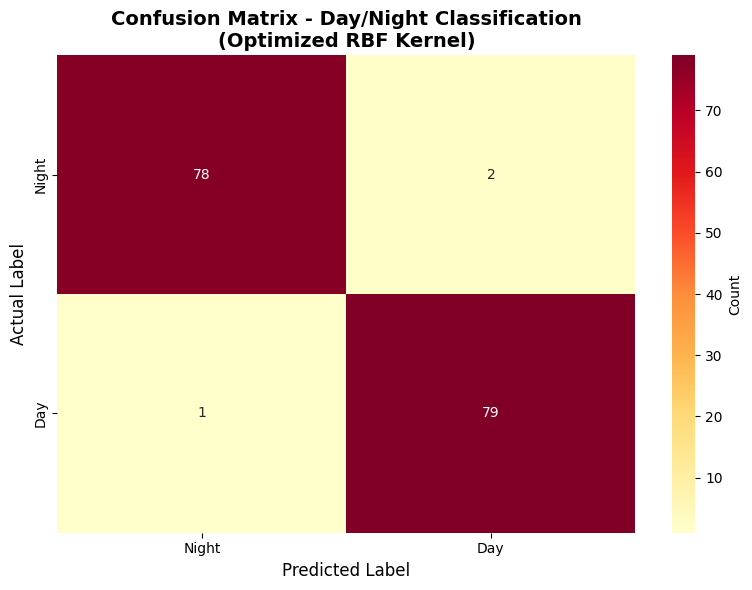

In [51]:
cm = confusion_matrix(y_test, opt_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd',
            xticklabels=['Night', 'Day'],
            yticklabels=['Night', 'Day'],
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Day/Night Classification\n(Optimized RBF Kernel)',
          fontsize=14, fontweight='bold')
plt.ylabel('Actual Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

In [52]:
top_trials = sorted(study.trials, key=lambda x: x.value, reverse=True)[:10]

trials_data = []
for t in top_trials:
    trials_data.append({
        'Trial': t.number,
        'C': f"{t.params['C']:.6f}",
        'Gamma': f"{t.params['gamma']:.6f}",
        'CV Accuracy': f"{t.value:.4f}"
    })

trials_df = pd.DataFrame(trials_data)
print(tabulate(trials_df, headers='keys', tablefmt='fancy_grid', showindex=False))

╒═════════╤═══════════╤══════════╤═══════════════╕
│   Trial │         C │    Gamma │   CV Accuracy │
╞═════════╪═══════════╪══════════╪═══════════════╡
│      42 │   3.69092 │ 0.005533 │             1 │
├─────────┼───────────┼──────────┼───────────────┤
│      44 │   3.16341 │ 0.005517 │             1 │
├─────────┼───────────┼──────────┼───────────────┤
│      45 │   1.17955 │ 0.005058 │             1 │
├─────────┼───────────┼──────────┼───────────────┤
│      52 │   3.02794 │ 0.005851 │             1 │
├─────────┼───────────┼──────────┼───────────────┤
│      81 │   0.54019 │ 0.000576 │             1 │
├─────────┼───────────┼──────────┼───────────────┤
│      84 │   1.15162 │ 0.000259 │             1 │
├─────────┼───────────┼──────────┼───────────────┤
│      88 │   1.40342 │ 0.000221 │             1 │
├─────────┼───────────┼──────────┼───────────────┤
│     107 │   2.50501 │ 0.005388 │             1 │
├─────────┼───────────┼──────────┼───────────────┤
│     108 │ 153.262   │ 0.00541

## Hasil

In [53]:
print(f"""
TUGAS 1: Voice Classification
------------------------------
Dataset: voice.csv
Models Tested: 6 (3 kernels × 2 splits)
Best Model: {best_model_info['Kernel']} kernel with {best_model_info['Split']} split
Best Test Accuracy: {best_model_info['Test Acc']:.4f}

TUGAS 2: Day/Night Classification
----------------------------------
Dataset: Image dataset (training + test)
Feature Extraction: Enhanced histogram (229 features)
Baseline Test Accuracy: {baseline_test_acc:.4f}
Optimized Test Accuracy: {opt_test_acc:.4f}
Improvement: {improvement:+.2f}%
Optuna Trials: 300
Best Parameters: C={best.params['C']:.4f}, gamma={best.params['gamma']:.6f}
""")


TUGAS 1: Voice Classification
------------------------------
Dataset: voice.csv
Models Tested: 6 (3 kernels × 2 splits)
Best Model: RBF kernel with 70:30 split
Best Test Accuracy: 0.9832

TUGAS 2: Day/Night Classification
----------------------------------
Dataset: Image dataset (training + test)
Feature Extraction: Enhanced histogram (229 features)
Baseline Test Accuracy: 0.9812
Optimized Test Accuracy: 0.9812
Improvement: +0.00%
Optuna Trials: 300
Best Parameters: C=3.6909, gamma=0.005533

